### Исследование и обработка данных

In [61]:
# Подключение библиотек pandas и sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Подключение библиотек matplotlib и seaborn для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение библиотеки pickle для сохранения модели
import pickle

In [31]:
TRAIN_DATA_PATH = "../data/raw/train.csv"
TEST_DATA_PATH = "../data/raw/test.csv"

NEW_TRAIN_DATA_PATH = "../data/processed/train.csv"
NEW_TEST_DATA_PATH = "../data/processed/test.csv"

In [38]:
# Считывание и представление данных
titanic_data = pd.read_csv(TRAIN_DATA_PATH, index_col=0)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


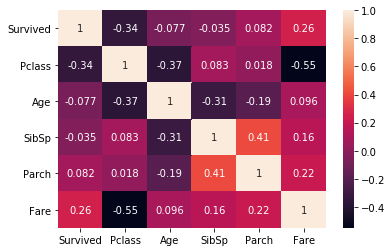

In [5]:
# Корреляция числовых данных между собой
sns.heatmap(titanic_data.corr(), annot = True)

In [39]:
# Проверка на то, какие поля/данные пропущены
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Заполнение пропущенных значений места посадки
titanic_data = titanic_data.fillna({"Embarked" : "S"}) # Нашли информацию об этих людях в сети Интернет

In [8]:
age_by_pclass_sex = titanic_data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('\nMedian age of all passengers: {}'.format(titanic_data['Age'].median()))

# Заполнение пропущенных значений возраста
titanic_data['Age'] = titanic_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0

Median age of all passengers: 28.0


In [9]:
# Для первого приближения опустим в расчётах значения полей Name, Cabin и Ticket
titanic_data = titanic_data.drop(["Name", "Cabin", "Ticket", "SibSp", "Parch"], axis=1)

In [10]:
# Проверка на то, какие поля/данные пропущены
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [11]:
# Разделение колонки Embarked
# One hot encoding –  Столбец разделяется на несколько (зависит от кол-ва уникальных значений) со значениями 0/1 внутри
titanic_data = pd.get_dummies(titanic_data, columns=["Sex", "Pclass", "Embarked"])
titanic_data.head()

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,22.0,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,71.2833,1,0,1,0,0,1,0,0
3,1,26.0,7.9250,1,0,0,0,1,0,0,1
4,1,35.0,53.1000,1,0,1,0,0,0,0,1
5,0,35.0,8.0500,0,1,0,0,1,0,0,1


После обработки тренировочные и тестовые данные будут выглядеть следующим образом:

In [43]:
train = pd.read_csv(NEW_TRAIN_DATA_PATH, index_col=0)
test = pd.read_csv(NEW_TEST_DATA_PATH, index_col=0)
display(train)
display(test)

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,22.0,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,71.2833,1,0,1,0,0,1,0,0
3,1,26.0,7.9250,1,0,0,0,1,0,0,1
4,1,35.0,53.1000,1,0,1,0,0,0,0,1
5,0,35.0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,13.0000,0,1,0,1,0,0,0,1
888,1,19.0,30.0000,1,0,1,0,0,0,0,1
889,0,21.5,23.4500,1,0,0,0,1,0,0,1


,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,34.5,7.8292,0,1,0,0,1,0,1,0
893,47.0,7.0000,1,0,0,0,1,0,0,1
894,62.0,9.6875,0,1,0,1,0,0,1,0
895,27.0,8.6625,0,1,0,0,1,0,0,1
896,22.0,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,24.0,8.0500,0,1,0,0,1,0,0,1
1306,39.0,108.9000,1,0,1,0,0,1,0,0
1307,38.5,7.2500,0,1,0,0,1,0,0,1


### Создание и тренировка модели

In [48]:
# Создание DataFrame с необходимыми фичами и вектора ответов
X = train.drop(["Survived"], axis = 1)
y = train.Survived

# Разделение выборки на тренировочную и тестирующую части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [50]:
# Создание дефолтного классификатора на основе "случайного леса"
clf = RandomForestClassifier()

# Обучение на тестовой части и проверка на тестовой выборке
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

Сделаем подбор нескольких гиперпараметров:

In [58]:
from tqdm import tqdm

max_depth_values = range(1, 20)
n_estimators_values = range(100, 500, 50)

best_score = 0

# Предположили дефолтные значения как лучшие
best_max_depth = None
best_n_estimators = 100

for max_depth in tqdm(max_depth_values):
    for n_estimators in (n_estimators_values):
        
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        mean_cross_val_score = cross_val_score(clf, X, y, cv = 5).mean()
        
        if mean_cross_val_score > best_score:
            best_score = mean_cross_val_score
            # best_model = clf
            best_max_depth = max_depth
            best_n_estimators = n_estimators

100%|██████████████████████████████████████████| 19/19 [10:46<00:00, 34.03s/it]


In [63]:
print(f"Best score: {best_score}")
print(f"Parameters: max_depth = {best_max_depth}, n_estimators = {best_n_estimators}")

best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

Best score: 0.8339087314041805
Parameters: max_depth = 9, n_estimators = 200


In [64]:
# Сохраняем модель
MODEL_PATH = "../models/rf_model.pkl"
pickle.dump(best_model, open(MODEL_PATH, 'wb'))

### Предсказание модели для тестовой выборки

In [66]:
# Загружаем модель
clf = pickle.load(open(MODEL_PATH, 'rb'))

# Тренируем классификатор на всех тренировочных данных
clf.fit(X, y)

# Создаём предсказания
predictions = clf.predict(test)
predictions_output = pd.DataFrame({"PassengerId" : test.index, "Survived" : predictions})

In [67]:
# Сохранение результата
RESULT_PATH = "../data/results/prediction.csv"
predictions_output.to_csv(RESULT_PATH, index = False)

display(predictions_output)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
